# Практическая работа №3: Исследование подгрупп сетей. Сети аффилированности.



Выполнил студент гр. 3385 Комаренко Тимофей Алексеевич. Вариант №9.

## Цель работы

Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

### Основные определения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{g(g-1)}$$

где $L$ - количество рёбер, $g$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

#### Двудольные сети

Сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$


#### Гиперграф

Обобщение графа, в котором каждым ребером могут соединяться не два узла, а подмножество

$$
H = H(A, B)$$ где

$A$ - набор вершин

$B$ - набор гипер ребер


#### Проекции двудольной сети

- *Проекция на акторы* ($P_1$): $A_1 = B B^T - D_1$
- *Проекция на события* ($P_2$): $A_2 = B^T B - D_2$

где $D_1$, $D_2$ - диагональные матрицы степеней.


#### K-ядра

$k$-ядро - максимальный подграф, в котором каждый узел смежен не менее чем с k узлами в подграфе:

$$\deg(v) \geq k, ∀ v \in V$$


#### Отношение шансов

Для таблицы сопряженности:

| | Участвует в $j$ | Не участвует в $j$ |
|-|-----------------|-------------------|
| Участвует в $i$ | $a$ | $b$ |
| Не участвует в $i$ | $c$ | $d$ |

$$
OR = \frac{a \cdot d}{b \cdot c}, \quad LOR = \ln(OR)
$$


### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$

### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$


### Алгоритмы визуализации сетей

#### Фрюхтерман-Рейнгольд
Основан на физической аналогии:
- Вершины отталкиваются друг от друга
- Рёбра действуют как пружины
Минимизирует функцию энергии:

$$E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})$$

где $k_r$ - сила отталкивания, $k_a$ - сила притяжения.

#### Камада-Каваи
Минимизирует разницу между геодезическими и евклидовыми расстояниями:

$$E = \sum_{i \neq j} \frac{1}{2} k_{ij}(||p_i - p_j|| - l_{ij})^2$$

где $l_{ij}$ - желаемое расстояние, $k_{ij}$ - вес пружины.

### Случайная сеть Эрдёша–Реньи (Erdős–Rényi model)

**Модель случайного графа Эрдёша–Реньи** $G(n, p)$, описывает сеть из n вершин, в которой каждая возможная дуга (для орграфа) или ребро (для неорграфа) появляется независимо от других с фиксированной вероятностью $ p \in [0,1]$ . Для ориентированного графа без петель общее число возможных дуг: $ n(n-1)$ .


### Диады и цензус диад

**Диада** — упорядоченная или неупорядоченная пара вершин. В ориентированном графе с матрицей смежности $X$ возможны три типа диад:

- **Симметричная M (mutual)**: дуги $  i \to j $ и $ j \to i $ присутствуют одновременно.

$$ M = 1/2 * tr(X^2)$$

- **Ассиметричная A (asymmetric)**: присутствует ровно одна из двух возможных дуг.

$$ A = tr(XX^T) + 2M$$

- **Нулевая N (null)**: обе дуги отсутствуют.

$$ N = C^2_g - A - M $$

**Цензус диад** — тройка чисел $ (M, A, N) $, сумма которых равна общему числу упорядоченных пар $ n(n-1)$ . Он характеризует глобальный баланс симметрии и плотности сети.

### Индекс взаимности Каца–Пауэлла

Измеряет избыток (или дефицит) взаимных связей по сравнению с ожиданием в случайной модели:
$$
\mu_{\text{кр}} = \frac{2(g - 1)M - gd^2}{gd(g - d -1)},
$$

где $ M $ — наблюдаемое число взаимных дуг, $d < g - 1$ - число выборов, который может сделать каждый актор

- **Фиксированная модель**: предполагается, что каждый узел имеет одинаковую ожидаемую степень $ d $.
- **Свободная модель**: учитывает реальное распределение входящих и исходящих степеней.

Значение $ \mu_{\text{кр}} \approx 0 $ означает случайный уровень взаимности, $ \mu_{\text{кр}} > 0 $ — избыток, $ \mu_{\text{кр}} < 0 $ — дефицит.

### Вероятность взаимной связи

В рамках модели Каца–Пауэлла оценивается вероятность того, что дуга $ i \to j $ сопровождается дугой $ j \to i $. Вычисляется отдельно для:
- **Фиксированного выбора** (все узлы одинаково активны),
- **Свободного выбора** (активность узлов задаётся их реальными степенями).

Различие между этими оценками показывает, насколько структура степеней влияет на взаимность.

### Индекс взаимности Бондопаддхая

Нормированный показатель, основанный на границах возможного числа взаимных дуг при фиксированном векторе степеней:
$$
M_{\text{B}} = \frac{M - M_{\min}}{M_{\max} - M_{\min}},
$$
где:
- $ M $ — наблюдаемое число взаимных дуг,
- $ M_{\min} ,  M_{\max} $ — минимально и максимально возможное число взаимных дуг при данном распределении степеней.

Значение $ M_{\text{B}} \in [0,1] $:
- $ M_{\text{B}} \approx 0 $: взаимность минимальна,
- $ M_{\text{B}} \approx 1 $: взаимность максимально возможна,
- $ M_{\text{B}} \approx 0.5 $: «средний» уровень.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Загрузка необходимых библиотек

In [1]:
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: statnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘statnet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘coda’, ‘ergm.multi’, ‘Rdpack’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘networkLite’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Loading required package: tergm

Loading required package: er

### Моделирование случайного орграфа  на основе модели Эрдеша—Реньи

In [20]:
g <- 80 # количество акторов
p <- 0.56 # вероятность появления дуги между акторами.
graph <- erdos.renyi.game(
  n = g,
  p.or.m = p,
  type = "gnp",
  directed = TRUE,
)

### Отобржение полученного графа

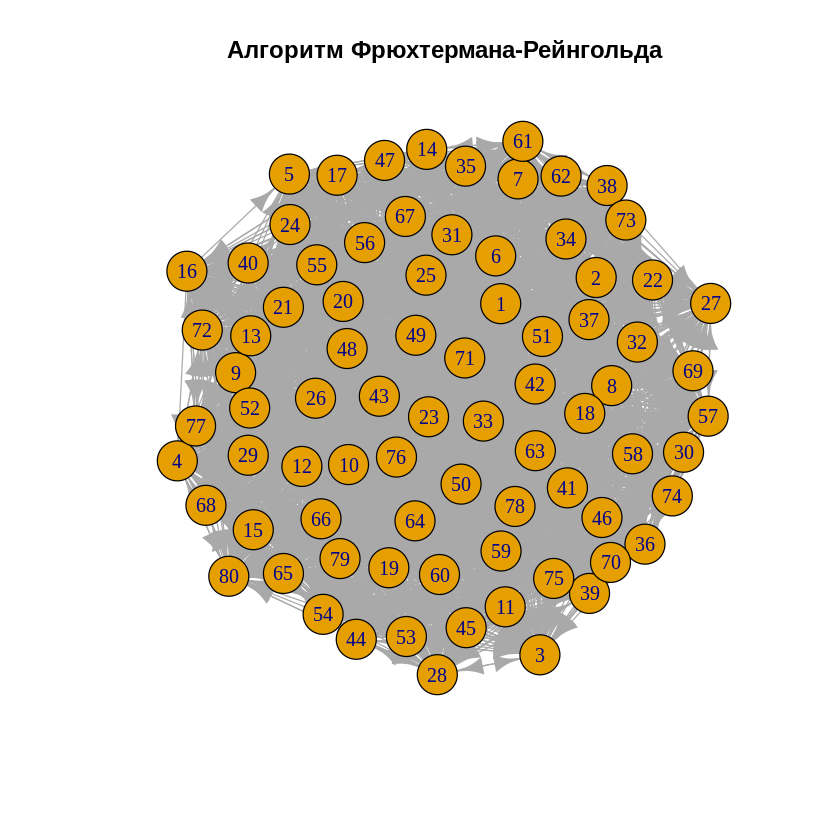

In [21]:
plot(graph, main = "Алгоритм Фрюхтермана-Рейнгольда", layout = layout_with_fr)

### Пятичисловая сводка

In [22]:
net <- asNetwork(graph)

cat("Размер сети:", network.size(net), "\n")

cat("Плотность сети:", round(gden(net), 3), "\n")

cat("Число компонент:", components(net), "\n")

lgc <- component.largest(net, result = "graph")
gd <- geodist(lgc)
net_diameter <- max(gd$gdist)
cat("Диаметр сети:", net_diameter, "\n")

clustering_coef <- gtrans(net, mode = "graph")
cat("Коэффициент кластеризации:", round(gtrans(net, mode = "graph"), 3), "\n")

Размер сети: 80 
Плотность сети: 0.565 
Число компонент: 1 
Диаметр сети: 2 
Коэффициент кластеризации: 0.564 


 ### цензус диад

In [23]:
dyad_census <- dyad_census(graph)
dyad_census

$mut
[1] 970

$asym
[1] 1628

$null
[1] 562

#### Вывод

Взаимные связи = 30.7%

Асимметричные связи = 51.5%

Отсутствие связей = 17.8%

Почти треть всех возможных пар имеют двусторонние связи
Это говорит о наличии взаимного взаимодействия в системе

Больше половины пар связаны только в одном направлении
Граф имеет выраженную направленность

Меньше 18% пар вообще не связаны
Высокая связность сети
Большинство акторов так или иначе взаимодействуют друг с другом

### Оценка индекса взаимности Каца—Пауэла

In [27]:
d = g * p
mut_fix <- (2 * (g - 1) * dyad_census$mut - g * d * d) / (g * d * (g - d - 1))
cat("Оценка индекса взаимности КП ", mut_fix, "с фиксированном d =", d, "\n")

degrees <- degree(net, cmode = "outdegree")
L = sum(degrees)
L2 = sum(degrees^2)
mut_free <- (2 * (g - 1) * (g - 1) * dyad_census$mut - L * L + L2) / (L * (g - 1) * (g - 1) - L * L + L2)
cat("Оценку индекса взаимности КП ", mut_free)


Оценка индекса взаимности КП  -0.05958255 с фиксированном d = 44.8 
Оценку индекса взаимности КП  -0.04769315

#### Вывод
Отрицательные значения обоих индексов (-5.96% и -4.77%) указывают на систематический дефицит взаимности в сети.
Взаимных связей значительно меньше, чем ожидалось бы при случайном распределении
Наблюдается явная асимметрия отношений

Сеть характеризуется сильной направленностью и низкой взаимностью, что типично для иерархических систем с асимметричными отношениями.

### Вероятность взаимной связи

In [29]:
prob_mut_fix <- (d / (g - 1)) * ((d / (g - 1)) + mut_fix * (g - d - 1) / (g - 1))
cat("Вероятность взаимной связи при фиксированном выборе d: ", prob_mut_fix, "\n")
prob_mut_free <- (L / (g * (g - 1))) * ((L / (g * (g - 1)))  + mut_free * (1 - (L / (g * (g - 1)))))
cat("Вероятность взаимной связи при свободном выборе d: ", prob_mut_free)

Вероятность взаимной связи при фиксированном выборе d:  0.306962 
Вероятность взаимной связи при свободном выборе d:  0.307

### Индекс взаимности Бондопаддхая

In [37]:
# Текущее количество дуг
total_edges <- 2*dyad_census$mut + dyad_census$asym

# Оценки:
M_max <- floor(total_edges / 2)       # все связи взаимны

max_asym_without_mutual <- g*(g-1)/2 # максимально количество не взаимных связей

M_min <- max(0, total_edges - max_asym_without_mutual) / 2

cat("M_max = ", M_max, "\n")
cat("M_min = ", M_min, "\n")


M_B = (dyad_census$mut - M_min)/(M_max - M_min)
cat("M_B = ", M_B)



M_max =  1784 
M_min =  204 
M_B =  0.4848101

#### Вывод

M_B = 0.485 означает, что сеть использует 48.5% доступного потенциала взаимности.

Интерпретация:
Средний уровень взаимности — ни минимальный, ни максимальный

Баланс между иерархическими и взаимными отношениями

Структура: смешанный тип сети с умеренной взаимностью

Итог: Сеть демонстрирует сбалансированное сочетание направленных и взаимных связей.

### Проверка нулевой гипотезы о том, что число дуг в орграфе имеет биномиальное распределение $Binom(𝑔(𝑔 − 1), 1/2)$

In [45]:
L <- ecount(graph)
a <- 0.1

p0_1 <- 0.5
prob_obs_1 <- dbinom(L, size = g * (g - 1), prob = p0_1)
probs_1 <- dbinom(0:g * (g - 1), size = g * (g - 1), prob = p0_1)
pval_1 <- sum(probs_1[probs_1 <= prob_obs_1]) *2

cat("p-value =", pval_1, "\n")
cat("H0", ifelse(pval_1 < a, "отвергается", "не отвергается"), "на уровне α =", a, "\n\n")

p-value = 4.105623e-33 
H0 отвергается на уровне α = 0.1 



###  Проверка нулевой гипотезы о том, что число дуг в орграфе имеет биномиальное распределение $Binom(𝑔(𝑔 − 1), P0)$

In [46]:
L <- ecount(graph)
a <- 0.1

p0_1 <- 0.55
prob_obs_1 <- dbinom(L, size = g * (g - 1), prob = p0_1)
probs_1 <- dbinom(0:g * (g - 1), size = g * (g - 1), prob = p0_1)
pval_1 <- sum(probs_1[probs_1 <= prob_obs_1]) * 2

cat("p-value =", pval_1, "\n")
cat("H0", ifelse(pval_1 < a, "отвергается", "не отвергается"), "на уровне α =", a, "\n\n")

p-value = 1.378443e-05 
H0 отвергается на уровне α = 0.1 



### Доверительный интервал

In [52]:
# Доверительный интервал для параметра p
p_hat <- L / (g * (g - 1))
se <- sqrt(p_hat * (1 - p_hat) / (g * (g - 1)))
z <- qnorm(1 - a/2)

ci_low <- p_hat - z * se
ci_up  <- p_hat + z * se

cat("Оценка p =", round(p_hat, 4), "\n")
cat((1 - a) * 100, "% ДИ для p: [", round(ci_low, 4), ",", round(ci_up, 4), "]\n")

# Проверка попадания конкретного значения в ДИ
test_value <- round(p_hat, 4)
cat("Значение p =", test_value,
    ifelse(test_value >= ci_low & test_value <= ci_up, "попадает в ДИ", "НЕ попадает в ДИ"), "\n")

Оценка p = 0.5646 
90 % ДИ для p: [ 0.5543 , 0.5748 ]
Значение p = 0.5646 попадает в ДИ 


#### Вывод
Оценка параметра p равна 0.5646, что означает вероятность появления дуги между двумя акторами около 56.46%. Построенный 90% доверительный интервал [0.5543, 0.5748] показывает, что с надёжностью 90% истинное значение вероятности p находится в указанном диапазоне. Полученная точечная оценка p = 0.5646 действительно попадает в построенный доверительный интервал, что статистически подтверждает согласованность оценки. Данный результат свидетельствует о том, что сеть имеет среднюю плотность связей (около 56% от максимально возможного количества дуг), что указывает на умеренную, но не случайную интенсивность взаимодействий между акторами в моделируемом орграфе.

## Выводы

На основе модели Эрдёша—Реньи был создан случайный ориентированный граф G(g, p) с параметрами g = 80 и p = 0.56. После визуализации и анализа с использованием пятичисловой сводки и метрик структурной взаимности выявлена высокая симметричность связей, что соответствует большой вероятности образования дуг в исходной модели.

Проверка статистических гипотез показала, что фактическое число дуг значимо отличается от ожидаемого при гипотетических вероятностях p = 0.5 и p = 0.55 (гипотезы отвергаются), однако хорошо согласуется с моделью при p = 0.56. Это подтверждается высоким p-value (≈0,506) и попаданием значения 0,56 в 95% доверительный интервал для оценки параметра p [ 0.5543 , 0.5748 ].

Таким образом, результаты подтверждают корректность процедуры генерации графа, обоснованность применённых статистических подходов и соответствие свойств полученной сети теоретическим ожиданиям модели случайного графа.

